In [2]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline


import flotilla
sns.set(style='ticks', context='talk')

figure_folder = 'figures'
! mkdir $figure_folder

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'

study = flotilla.embark('singlecell_pnm_miso_modalities', flotilla_dir=flotilla_dir)

mkdir: cannot create directory `figures': File exists
2016-07-21 08:58:51	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_miso_modalities/datapackage.json
2016-07-21 08:58:51	Parsing datapackage to create a Study object
2016-07-21 08:59:30 	Initializing Study
2016-07-21 08:59:30 	Initializing Predictor configuration manager for Study
2016-07-21 08:59:30	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-21 08:59:30	Added ExtraTreesClassifier to default predictors
2016-07-21 08:59:30	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-21 08:59:30	Added ExtraTreesRegressor to default predictors
2016-07-21 08:59:30	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-21 08:59:30	Added GradientBoostingClassifier to default predictors
2016-07-21 08:59:30	Predictor GradientB

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


## AHSA1 MXE uncategorized

In [3]:
event = '''chr14:77928503:77928585:+ chr14:77928985:77929102:+ chr14:77934426:77934527:+ chr14:77935420:77935813:+'''.replace(' ', '@')
event

'chr14:77928503:77928585:+@chr14:77928985:77929102:+@chr14:77934426:77934527:+@chr14:77935420:77935813:+'

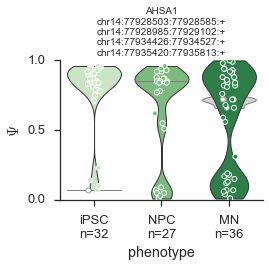

In [4]:
study.plot_event(event)

In [5]:
psi = study.splicing.data[event].dropna()
psi.head()

CVN_06    0.07
CVN_18    0.92
CVN_19    0.94
CVN_23    0.85
CVN_29    0.85
Name: chr14:77928503:77928585:+@chr14:77928985:77929102:+@chr14:77934426:77934527:+@chr14:77935420:77935813:+, dtype: float64

In [6]:
psi[psi < 0.5]

CVN_06     0.07
M1_07      0.06
M2_09      0.19
M2nd_10    0.31
M2nd_12    0.13
M2nd_16    0.04
M2nd_22    0.07
M2nd_26    0.15
M2nd_29    0.17
M3_07      0.07
M5_01      0.01
M5_03      0.12
M6_03      0.18
M6_05      0.01
N1_01      0.03
N2_01      0.01
N2_12      0.05
N3_05      0.09
N4_06      0.05
P1_04      0.10
P2_06      0.07
P2_10      0.14
P7_09      0.23
Name: chr14:77928503:77928585:+@chr14:77928985:77929102:+@chr14:77934426:77934527:+@chr14:77935420:77935813:+, dtype: float64

In [7]:
psi[['P2_02', 'P1_05',]]

P2_02    0.87
P1_05    0.84
Name: chr14:77928503:77928585:+@chr14:77928985:77929102:+@chr14:77934426:77934527:+@chr14:77935420:77935813:+, dtype: float64

In [8]:
psi[['N3_03', 'N3_02', 'M6_04', 'M4_06', 'M6_03']]

N3_03    0.92
N3_02    0.78
M6_04    0.92
M4_06    0.94
M6_03    0.18
Name: chr14:77928503:77928585:+@chr14:77928985:77929102:+@chr14:77934426:77934527:+@chr14:77935420:77935813:+, dtype: float64

## ACADM MXE uncategorized

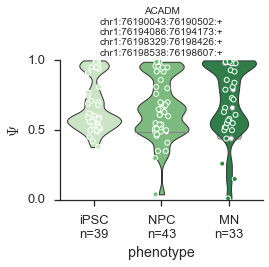

In [9]:
event = 'chr1:76190043:76190502:+ chr1:76194086:76194173:+ chr1:76198329:76198426:+ chr1:76198538:76198607:+'.replace(' ', '@')
study.plot_event(event)

In [10]:
psi = study.splicing.data[event]
psi.head()

CVN_01     NaN
CVN_02     NaN
CVN_03    0.99
CVN_04    0.30
CVN_05    0.70
Name: chr1:76190043:76190502:+@chr1:76194086:76194173:+@chr1:76198329:76198426:+@chr1:76198538:76198607:+, dtype: float64

In [11]:
psi[['P9_01', 'P2_03', 'CVN_04', 'CVN_21', 'N3_03', 'M6_04', 'M6_07']]

P9_01     1.00
P2_03     0.49
CVN_04    0.30
CVN_21    0.49
N3_03     0.86
M6_04     0.99
M6_07     0.57
Name: chr1:76190043:76190502:+@chr1:76194086:76194173:+@chr1:76198329:76198426:+@chr1:76198538:76198607:+, dtype: float64

In [12]:
psi[['P9_01', 'P2_03', 'P2_02', 'CVN_04', 'CVN_21', 'N3_03', 'M6_04', 'M6_07']]

P9_01     1.00
P2_03     0.49
P2_02      NaN
CVN_04    0.30
CVN_21    0.49
N3_03     0.86
M6_04     0.99
M6_07     0.57
Name: chr1:76190043:76190502:+@chr1:76194086:76194173:+@chr1:76198329:76198426:+@chr1:76198538:76198607:+, dtype: float64

## CFL1 SE middle

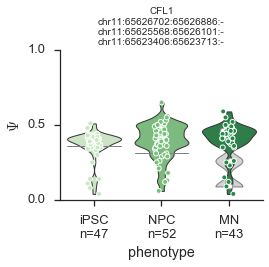

In [13]:
event = 'chr11:65626702:65626886:- chr11:65625568:65626101:- chr11:65623406:65623713:-'.replace(' ', '@')
study.plot_event(event)

In [14]:
psi = study.splicing.data[event]
psi.head()

CVN_01    0.50
CVN_02    0.50
CVN_03    0.51
CVN_04     NaN
CVN_05    0.49
Name: chr11:65626702:65626886:-@chr11:65625568:65626101:-@chr11:65623406:65623713:-, dtype: float64

In [15]:
psi[['P2_03', 'P2_02', 'P1_05', 'N3_04', 'N3_03', 'N3_02', "M6_04", 'M6_07']]

P2_03    0.42
P2_02    0.37
P1_05    0.42
N3_04    0.43
N3_03    0.37
N3_02    0.18
M6_04    0.41
M6_07     NaN
Name: chr11:65626702:65626886:-@chr11:65625568:65626101:-@chr11:65623406:65623713:-, dtype: float64

## ARF4 MXE event

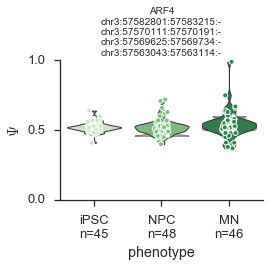

In [16]:
event = 'chr3:57582801:57583215:- chr3:57570111:57570191:- chr3:57569625:57569734:- chr3:57563043:57563114:-'.replace(' ', '@')
study.plot_event(event)

In [17]:
psi = study.splicing.data[event].dropna()
psi.head()

CVN_01    0.51
CVN_03    0.45
CVN_06    0.53
CVN_08    0.50
CVN_09    0.56
Name: chr3:57582801:57583215:-@chr3:57570111:57570191:-@chr3:57569625:57569734:-@chr3:57563043:57563114:-, dtype: float64

In [18]:
psi[['M6_06', 'P9_01', 'P9_02', "CVN_15", 'CVN_12', 'M6_04', 'M6_07'] ]

M6_06      NaN
P9_01      NaN
P9_02      NaN
CVN_15     NaN
CVN_12    0.63
M6_04     0.48
M6_07     0.52
Name: chr3:57582801:57583215:-@chr3:57570111:57570191:-@chr3:57569625:57569734:-@chr3:57563043:57563114:-, dtype: float64

In [22]:
samples = ['P1_08', 'P1_10', "CVN_24", "CVN_27", 'M2_10', 'M2nd_07']
psi[samples]

P1_08      0.56
P1_10      0.53
CVN_24     0.72
CVN_27     0.52
M2_10      0.55
M2nd_07    0.53
Name: chr3:57582801:57583215:-@chr3:57570111:57570191:-@chr3:57569625:57569734:-@chr3:57563043:57563114:-, dtype: float64